## Cross Country Comparison for Relative Solar Potential and Key Differences Across the 3 Countries.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets
benin_data = pd.read_csv('data/benin_clean.csv')
sierra_leone_data = pd.read_csv('data/sierra_leone_clean.csv')
togo_data = pd.read_csv('data/togo_clean.csv')

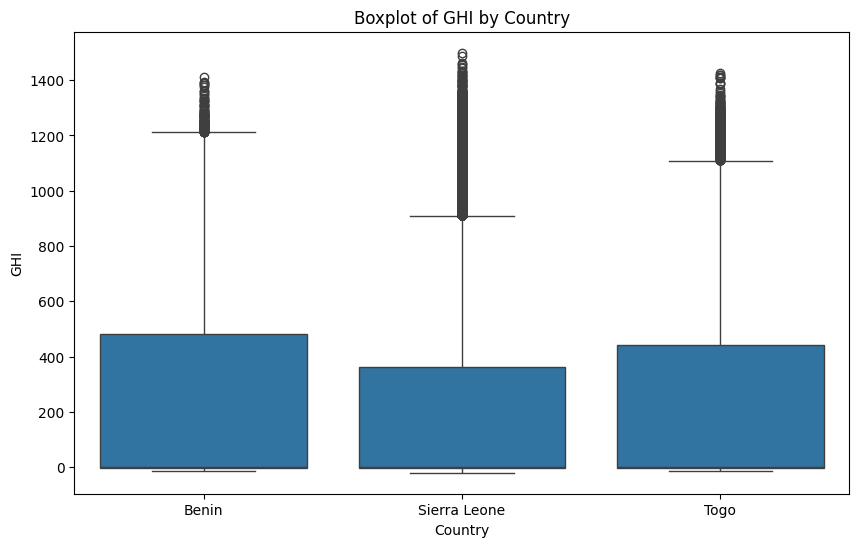

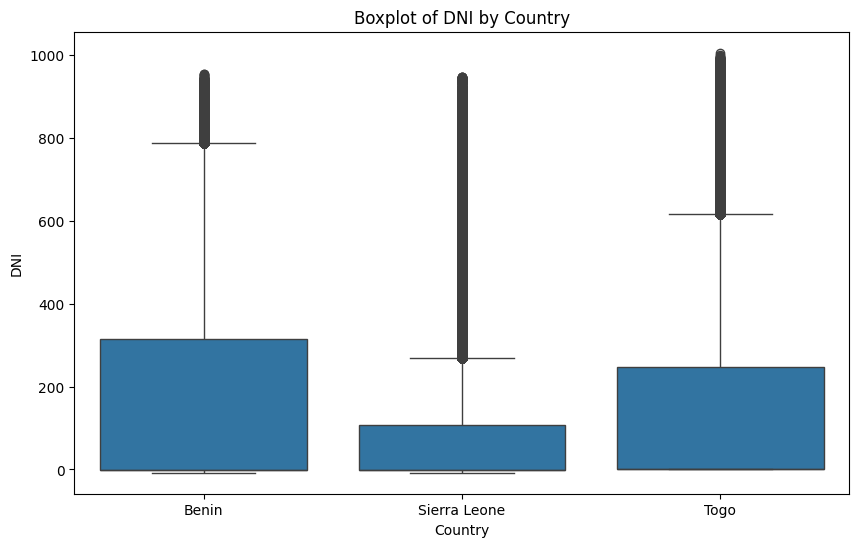

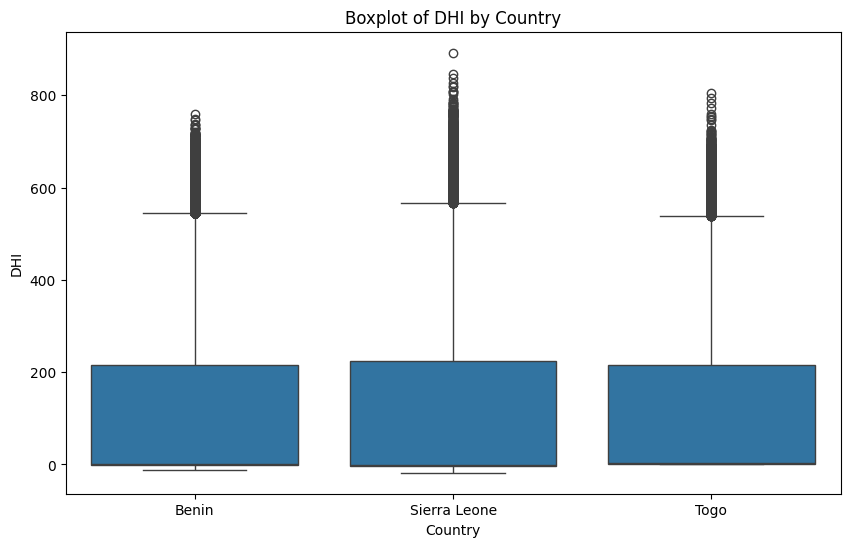

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the data into one DataFrame for plotting
benin_data['Country'] = 'Benin'
sierra_leone_data['Country'] = 'Sierra Leone'
togo_data['Country'] = 'Togo'

combined_data = pd.concat([benin_data, sierra_leone_data, togo_data])

# Create boxplots
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y=metric, data=combined_data)
    plt.title(f'Boxplot of {metric} by Country')
    plt.show()

In [4]:
summary_stats = combined_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary_stats

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [5]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
benin_ghi = benin_data['GHI']
sierra_leone_ghi = sierra_leone_data['GHI']
togo_ghi = togo_data['GHI']

# Run ANOVA
f_stat, p_value = f_oneway(benin_ghi, sierra_leone_ghi, togo_ghi)
print(f'ANOVA p-value: {p_value}')

ANOVA p-value: 0.0


### Key Observations
- Togo has the highest median GHI (2.1), indicating that it experiences higher solar irradiance on average compared to the others.
- Benin has the highest standard deviation for GHI (331.13), suggesting it has the greatest variability in solar irradiance readings.
- Sierra Leone shows the lowest mean GHI (201.96) and median GHI (0.3), indicating it generally has lower solar potential compared to Benin and Togo.
DNI and DHI:
For DNI, Benin has the highest mean (167.19) and median (-0.1), indicating strong direct normal irradiance.
For DHI, Togo has the highest mean DHI (116.44), suggesting better diffuse solar radiation.

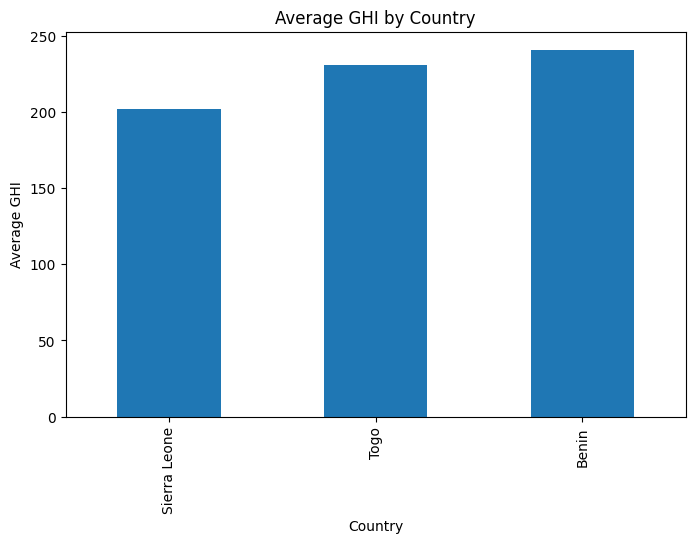

In [6]:
average_ghi = combined_data.groupby('Country')['GHI'].mean().sort_values()

plt.figure(figsize=(8, 5))
average_ghi.plot(kind='bar')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.show()